In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
plt.style.use("bmh")
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("metadata.csv")

In [4]:
df.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [5]:
df.shape

(954501, 6)

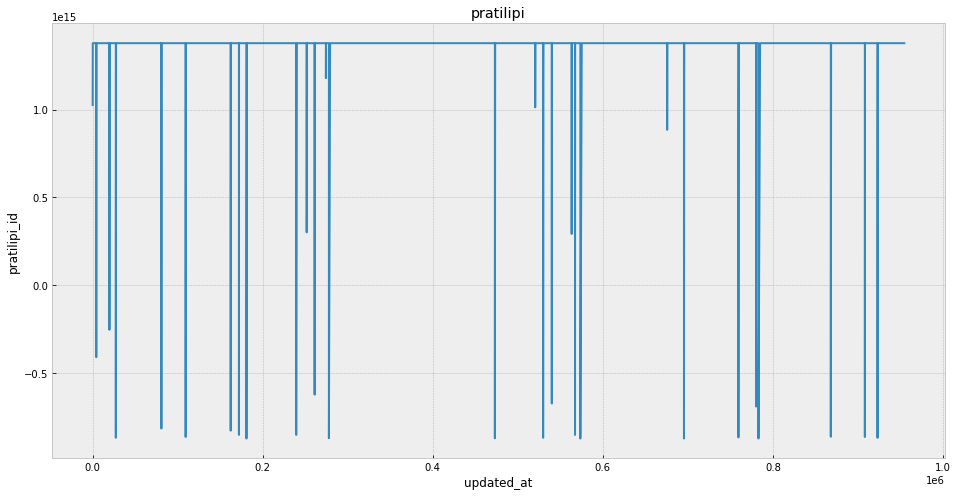

In [6]:
plt.figure(figsize=(16,8))
plt.title("pratilipi")
plt.xlabel("updated_at")
plt.ylabel("pratilipi_id")
plt.plot(df["pratilipi_id"])
plt.show()

In [7]:
df = df[["pratilipi_id"]]
df.head()

,pratilipi_id
0,1025741862639304
1,1377786215601277
2,1377786215601962
3,1377786215640994
4,1377786215931338


In [8]:
# Create a variable to predict "x" reading out into future
future_pratilipi = 25
# Create a new column (target) shifted "x" pratilipi/day up
df["Prediction"] = df[["pratilipi_id"]].shift(-future_pratilipi)
df.tail()

,pratilipi_id,Prediction
954496,1377786228358627,NaN
954497,1377786228362002,NaN
954498,1377786228362682,NaN
954499,1377786228375726,NaN
954500,1377786228376825,NaN


In [9]:
# Create the feature dataset (X) and convert it to a numpy array and remove the last "x" rows/days
X = np.array(df.drop(["Prediction"],1))[:-future_pratilipi]
X

array([[1025741862639304],
       [1377786215601277],
       [1377786215601962],
       ...,
       [1377786228284242],
       [1377786228284281],
       [1377786228284414]], dtype=int64)

In [10]:
# Create the target data set (y) convert it to numpy array and get all of the target values except the last 'x' rows
y = np.array(df["Prediction"])[:-future_pratilipi]
y

array([1.37778622e+15, 1.37778622e+15, 1.37778622e+15, ...,
       1.37778623e+15, 1.37778623e+15, 1.37778623e+15])

# 2.Spliting the data

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# 3.Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler # Scaling for linear Regression is not strictly required for better practice we are doing standardscaling
scaler = StandardScaler() #initialise to a variable for standard scaler
scaler.fit(X_train,y_train) #fitting the train datset.we dont fit test dataset as we are going to use the test dataset directly for evalution
X_train = scaler.transform(X_train) #transform of train data
X_test = scaler.transform(X_test) #transform of test data

# 4.Model

In [13]:

#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train,y_train)
#Create the linear regression model
# lr = LinearRegression().fit(X_train, y_train)
#Create the random forest regression
rfr = RandomForestRegressor().fit(X_train, y_train)
#Create the knearest neighbor
neigh = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)
#Create the xgb algorithm
for lr in [0.7]:
  xgb_model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  xgb_model.fit(X_train,y_train) #train the model

In [14]:
# Get the last "x" rows of the feature data set
X_future = df.drop(["Prediction"],1)[:-future_pratilipi]
X_future = X_future.tail(future_pratilipi)
X_future = np.array(X_future)
X_future

array([[1377786228273790],
       [1377786228273836],
       [1377786228274766],
       [1377786228276018],
       [1377786228280055],
       [1377786228281790],
       [1377786228282941],
       [1377786228283329],
       [1377786228283385],
       [1377786228283418],
       [1377786228283463],
       [1377786228283526],
       [1377786228283580],
       [1377786228283638],
       [1377786228283672],
       [1377786228283736],
       [1377786228283784],
       [1377786228284023],
       [1377786228284095],
       [1377786228284132],
       [1377786228284174],
       [1377786228284208],
       [1377786228284242],
       [1377786228284281],
       [1377786228284414]], dtype=int64)

In [15]:
#Show the model predictions
Decision_tree_prediction = tree.predict(X_future)
print(Decision_tree_prediction)
# lr_prediction = lr.predict(X_future)
# print(lr_prediction)
RandomForest_prediction = rfr.predict(X_future)
print(RandomForest_prediction)
KNN_prediction = neigh.predict(X_future)
print(KNN_prediction)
xgboost_prediction = xgb_model.predict(X_future)
print(xgboost_prediction)

[1.37684884e+15 1.37684884e+15 1.37684884e+15 1.37684884e+15
 1.37684884e+15 1.37684884e+15 1.37684884e+15 1.37684884e+15
 1.37684884e+15 1.37684884e+15 1.37684884e+15 1.37684884e+15
 1.37684884e+15 1.37684884e+15 1.37684884e+15 1.37684884e+15
 1.37684884e+15 1.37684884e+15 1.37684884e+15 1.37684884e+15
 1.37684884e+15 1.37684884e+15 1.37684884e+15 1.37684884e+15
 1.37684884e+15]
[1.37685255e+15 1.37685255e+15 1.37685255e+15 1.37685255e+15
 1.37685255e+15 1.37685255e+15 1.37685255e+15 1.37685255e+15
 1.37685255e+15 1.37685255e+15 1.37685255e+15 1.37685255e+15
 1.37685255e+15 1.37685255e+15 1.37685255e+15 1.37685255e+15
 1.37685255e+15 1.37685255e+15 1.37685255e+15 1.37685255e+15
 1.37685255e+15 1.37685255e+15 1.37685255e+15 1.37685255e+15
 1.37685255e+15]
[1.37778622e+15 1.37778622e+15 1.37778622e+15 1.37778622e+15
 1.37778622e+15 1.37778622e+15 1.37778622e+15 1.37778622e+15
 1.37778622e+15 1.37778622e+15 1.37778622e+15 1.37778622e+15
 1.37778622e+15 1.37778622e+15 1.37778622e+15 1.377

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
regressor_predict = regressor.predict(X_future)

In [18]:
print(regressor_predict)

[1.47028688e+29 1.47028688e+29 1.47028688e+29 1.47028688e+29
 1.47028688e+29 1.47028688e+29 1.47028688e+29 1.47028688e+29
 1.47028688e+29 1.47028688e+29 1.47028688e+29 1.47028688e+29
 1.47028688e+29 1.47028688e+29 1.47028688e+29 1.47028688e+29
 1.47028688e+29 1.47028688e+29 1.47028688e+29 1.47028688e+29
 1.47028688e+29 1.47028688e+29 1.47028688e+29 1.47028688e+29
 1.47028688e+29]


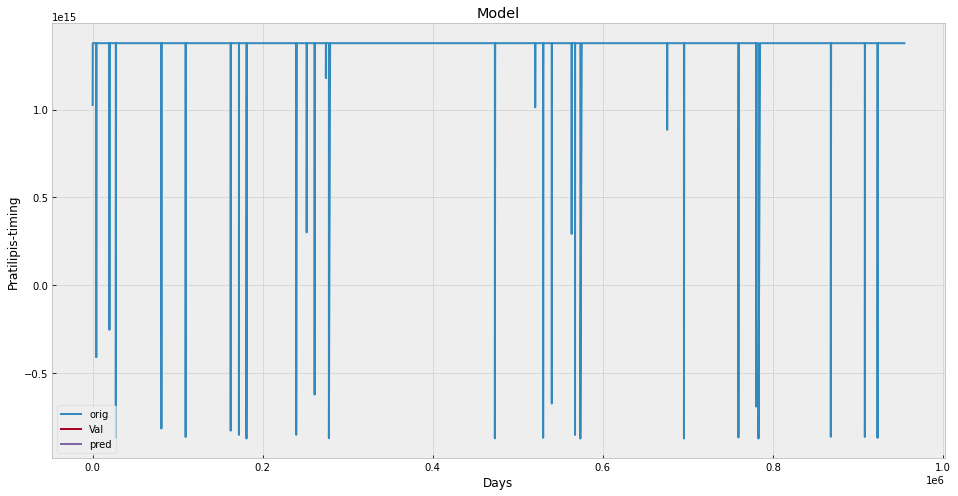

In [23]:
## Visualize the data
prediction = Decision_tree_prediction

valid=df[X.shape[0]:]
valid["prediction"]=prediction
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Pratilipis-timing")
plt.plot(df["pratilipi_id"])
plt.plot(valid[["pratilipi_id","prediction"]])
plt.legend(["orig","Val","pred"])
plt.show()


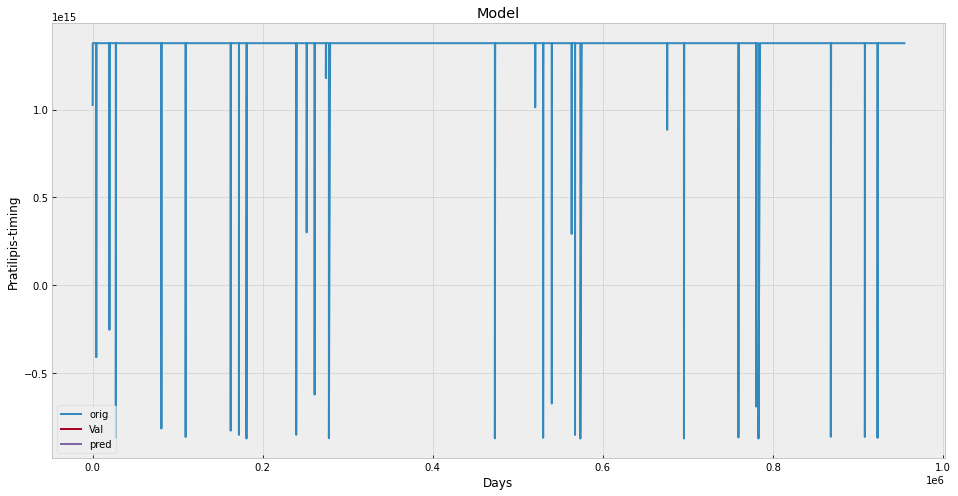

In [25]:
prediction = RandomForest_prediction

valid=df[X.shape[0]:]
valid["prediction"]=prediction
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Pratilipis-timing")
plt.plot(df["pratilipi_id"])
plt.plot(valid[["pratilipi_id","prediction"]])
plt.legend(["orig","Val","pred"])
plt.show()


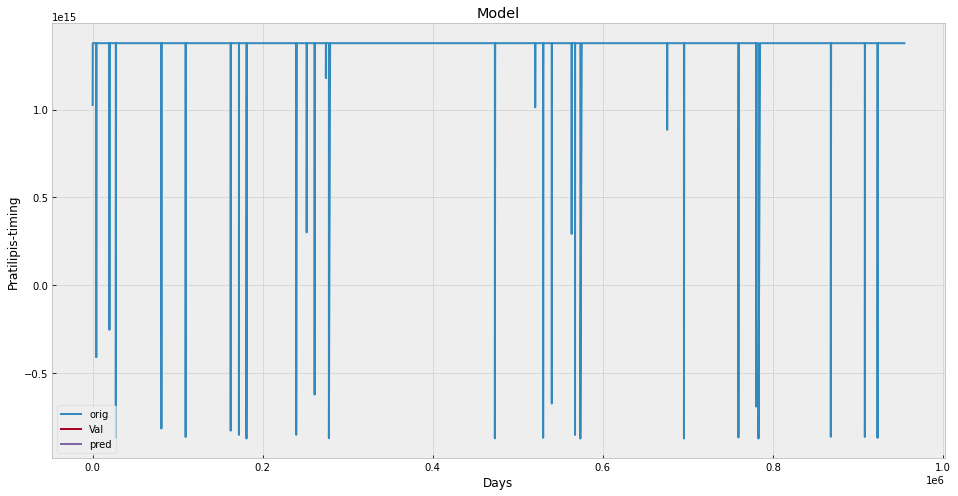

In [26]:
prediction = KNN_prediction

valid=df[X.shape[0]:]
valid["prediction"]=prediction
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Pratilipis-timing")
plt.plot(df["pratilipi_id"])
plt.plot(valid[["pratilipi_id","prediction"]])
plt.legend(["orig","Val","pred"])
plt.show()


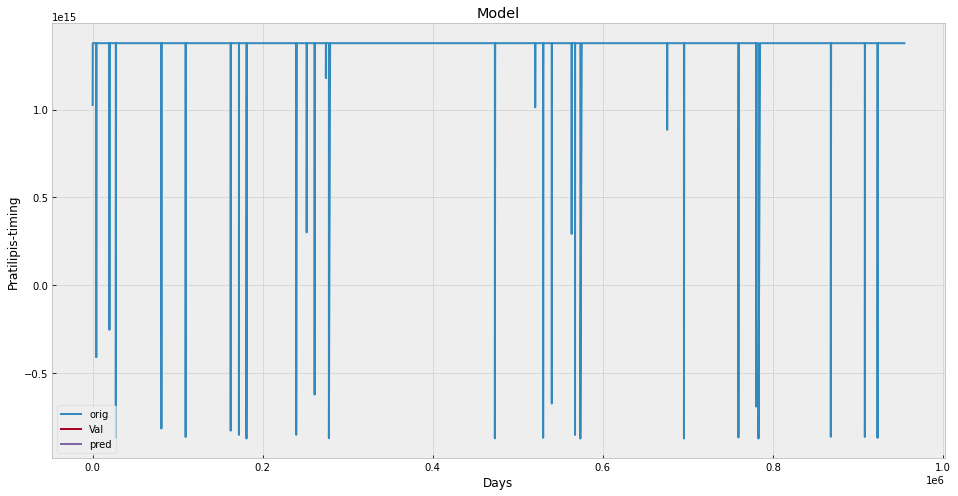

In [27]:
prediction = xgboost_prediction

valid=df[X.shape[0]:]
valid["prediction"]=prediction
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Pratilipis-timing")
plt.plot(df["pratilipi_id"])
plt.plot(valid[["pratilipi_id","prediction"]])
plt.legend(["orig","Val","pred"])
plt.show()
